# Bruteforce for Maxcut problem
This notebook runs the brute force Max-Cut algorithm on as many random graphs as possible for each size, within a fixed time budget. It records computation time and cut value for each instance, saves results for statistical analysis, and saves plots for reporting.


In [12]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import pandas as pd
import seaborn as sns
import os
from datetime import datetime

## Graph generating

In [13]:
def generate_random_graph(n_nodes=8, p=0.5, seed=None):
    G = nx.erdos_renyi_graph(n_nodes, p, seed=seed)
    for (u, v) in G.edges():
        G.edges[u, v]['weight'] = np.random.randint(1, 10)
    return G

## Algorithm

In [14]:
def brute_force_maxcut(G):
    n = G.number_of_nodes()
    nodes = list(G.nodes())
    best_cut = None
    best_value = -np.inf
    for bits in itertools.product([0, 1], repeat=n):
        cut_value = 0
        for u, v in G.edges():
            if bits[nodes.index(u)] != bits[nodes.index(v)]:
                cut_value += G.edges[u, v]['weight']
        if cut_value > best_value:
            best_value = cut_value
            best_cut = bits
    return best_cut, best_value

## Experiment function

In [15]:
def run_bruteforce_experiment_time_budget(sizes, edge_prob=0.5, time_per_size=420):
    all_cut_values = []
    all_times = []
    for n_nodes in sizes:
        cut_values = []
        times = []
        start_time = time.time()
        g_idx = 0
        while time.time() - start_time < time_per_size:
            G = generate_random_graph(n_nodes=n_nodes, p=edge_prob, seed=g_idx)
            t0 = time.time()
            cut, value = brute_force_maxcut(G)
            t1 = time.time()
            cut_values.append(value)
            times.append(t1 - t0)
            g_idx += 1
        all_cut_values.append(cut_values)
        all_times.append(times)
        print(f"Size: {n_nodes} | Graphs: {g_idx} | Mean Cut: {np.mean(cut_values):.2f} | Mean Time: {np.mean(times):.3f}s")
    return all_cut_values, all_times

## Experiment
- Graph sizes: 8, 10, 12, 14, 16 nodes
- Edge probability: 0.5 (can be changed for different densities)
- Time per size: 60 seconds

Size: 8 | Graphs: 343589 | Mean Cut: 57.61 | Mean Time: 0.002s
Size: 10 | Graphs: 60024 | Mean Cut: 89.16 | Mean Time: 0.010s
Size: 12 | Graphs: 10569 | Mean Cut: 126.85 | Mean Time: 0.057s
Size: 14 | Graphs: 1898 | Mean Cut: 171.34 | Mean Time: 0.316s
Size: 16 | Graphs: 355 | Mean Cut: 220.45 | Mean Time: 1.691s
Results saved to data/bf-data/bf_20250615_000714.csv


C:\Users\jakub\AppData\Local\Temp\ipykernel_9488\606142865.py:28: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Graph Size', y='Time', data=df, inner='quartile', scale='width')


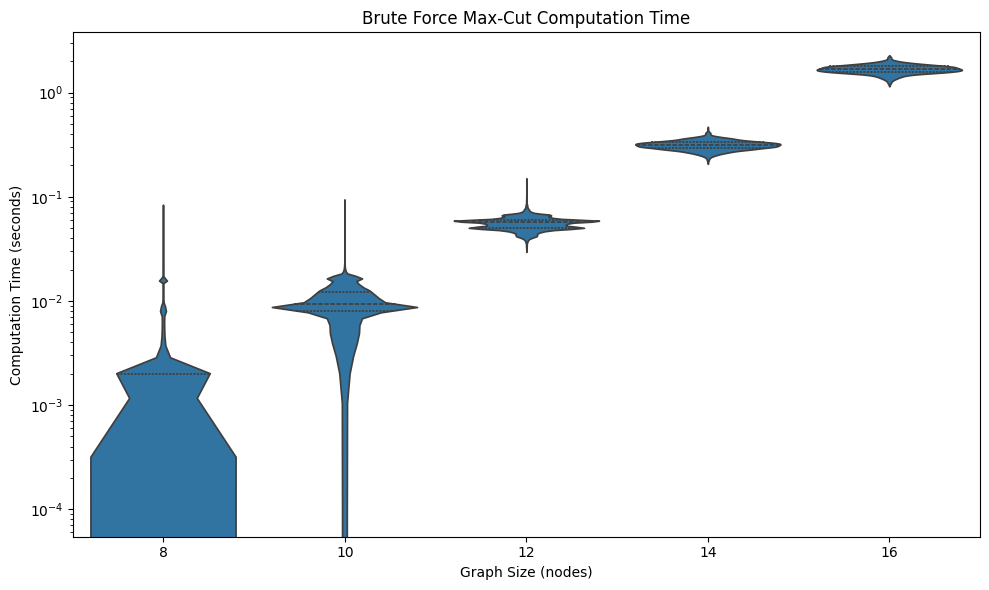

Plot saved to plots/bf_20250615_000715\bf_violin_20250615_000715.png


In [ ]:
sizes = [8, 10, 12, 14, 16]
edge_prob = 0.5
time_per_size = 600  # seconds
# 6 sizes with 600 seconds each = 1 hour total

cut_values, times = run_bruteforce_experiment_time_budget(sizes, edge_prob, time_per_size)

df = pd.DataFrame({
    'Graph Size': sum([[size]*len(vals) for size, vals in zip(sizes, cut_values)], []),
    'Cut Value': sum(cut_values, []),
    'Time': sum(times, [])
})

# Save CSV
os.makedirs("data/bf-data", exist_ok=True)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
csv_path = f"data/bf-data/bf_{timestamp}.csv"
df.to_csv(csv_path, index=False)
print(f"Results saved to {csv_path}")

# Save plot
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
plot_dir = f"plots/bf_{timestamp}"
os.makedirs(plot_dir, exist_ok=True)
plot_path = os.path.join(plot_dir, f"bf_violin_{timestamp}.png")

plt.figure(figsize=(10,6))
sns.violinplot(x='Graph Size', y='Time', data=df, inner='quartile', density_norm='width')
plt.title('Brute Force Max-Cut Computation Time')
plt.xlabel('Graph Size (nodes)')
plt.ylabel('Computation Time (seconds)')
plt.yscale('log')
plt.tight_layout()
plt.savefig(plot_path)
plt.show()
print(f"Plot saved to {plot_path}")